# 核支持向量机 SVM

In [1]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.svm import SVC

Text(0,0.5,'Featuee 1')

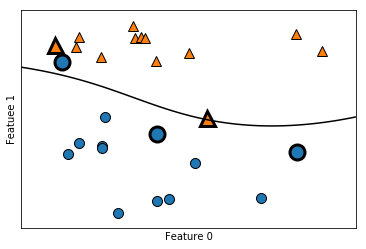

In [5]:
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1:],y)
#画出支持向量
sv=svm.support_vectors_
#支持向量的类别标签由dual_coef_的正负号给出
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Featuee 1')

### svm调参

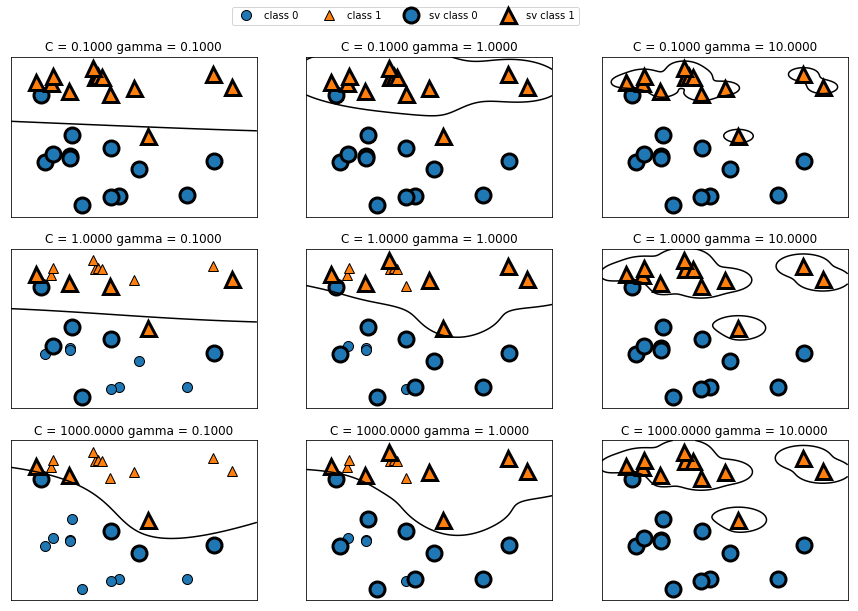

In [10]:
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
        
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                 ncol=4, loc=(.9, 1.2))

## cancer

In [11]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [12]:
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


In [14]:
X_train.shape

(426, 30)

In [13]:
#虽然 SVM 的表现通常都很好，但它对参数的设定和数据的缩放非常敏感。特别地，
#它要求所有特征有相似的变化范围

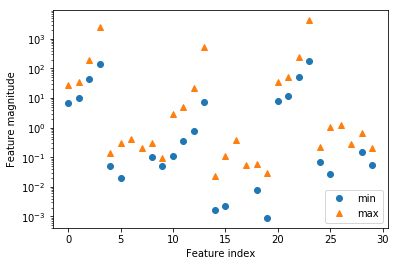

In [15]:
#我们来看一下每个特征的最小值和最大值，它们绘制
#在对数坐标上
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

### 数据处理

In [16]:
#从这张图中，我们可以确定乳腺癌数据集的特征具有完全不同的数量级。这对其他模型来
#说（比如线性模型）可能是小问题，但对核 SVM 却有极大影响。我们来研究处理这个问
#题的几种方法

In [18]:
#缩放到0-1之间
# 计算训练集中每个特征的最小值
min_on_train=X_train.min(axis=0)
#计算训练集中每个特征的范围（最大值-最小值）
range_on_train=(X_train-min_on_train).max(axis=0)

#减去最小值，然后除以范围，这样每个特征都是min=0，max=1
X_train_scaled=(X_train-min_on_train)/range_on_train
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [21]:
# 利用训练集的最小值和范围对测试集做相同的变换（详见第3章）
X_test_scaled = (X_test - min_on_train) / range_on_train

In [22]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [23]:
#数据缩放的作用很大！实际上模型现在处于欠拟合的状态，因为训练集和测试集的性能非
#常接近，但还没有接近 100% 的精度。从这里开始，我们可以尝试增大 C 或 gamma 来拟合
#更为复杂的模型

In [24]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


### 优点缺点参数 

In [ ]:
'''
核支持向量机是非常强大的模型，在各种数据集上的表现都很好。 SVM 允许决策边界很
复杂，即使数据只有几个特征。它在低维数据和高维数据（即很少特征和很多特征）上的
表现都很好，但对样本个数的缩放表现不好。在有多达 10 000 个样本的数据上运行 SVM
可能表现良好，但如果数据量达到 100 000 甚至更大，在运行时间和内存使用方面可能会
面临挑战。
SVM 的另一个缺点是，预处理数据和调参都需要非常小心。这也是为什么如今很多应用
中用的都是基于树的模型，比如随机森林或梯度提升（需要很少的预处理，甚至不需要预
处理）。此外， SVM 模型很难检查，可能很难理解为什么会这么预测，而且也难以将模型
向非专家进行解释。
不过 SVM 仍然是值得尝试的，特别是所有特征的测量单位相似（比如都是像素密度）而
且范围也差不多时。
核 SVM 的重要参数是正则化参数 C、核的选择以及与核相关的参数。虽然我们主要讲的是
RBF 核，但 scikit-learn 中还有其他选择。 RBF 核只有一个参数 gamma，它是高斯核宽度
的倒数。 gamma 和 C 控制的都是模型复杂度，较大的值都对应更为复杂的模型。因此，这
两个参数的设定通常是强烈相关的，应该同时调节。
'''